## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = merged_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = merged_df[merged_df["Mouse ID"] =="g989"]
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="last")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = merged_df["Mouse ID"].nunique()
mice_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by Drug Regimen
grouped_regimen_df = merged_df.groupby(["Drug Regimen"])

#Calculate Tumor Volume Mean
tv_mean = grouped_regimen_df["Tumor Volume (mm3)"].mean()

#Calculate Tumor Volume Median
tv_median = grouped_regimen_df["Tumor Volume (mm3)"].median()


#Calculate Tumor Volume Variance
tv_var = grouped_regimen_df["Tumor Volume (mm3)"].var()

#Calculate Tumor Volume Standard Deviation
tv_sd = grouped_regimen_df["Tumor Volume (mm3)"].std()

#Calculate Tumor Volume SEM
tv_sem = grouped_regimen_df["Tumor Volume (mm3)"].sem()
                               
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_summary_table = pd.DataFrame({"Mean": tv_mean,
                                     "Median": tv_median,
                                     "Variance": tv_var,
                                     "Standard Deviation": tv_sd,
                                     "SEM": tv_sem})

regimen_summary_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

drug_regimen_summary = merged_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

drug_regimen_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Treatment Types')

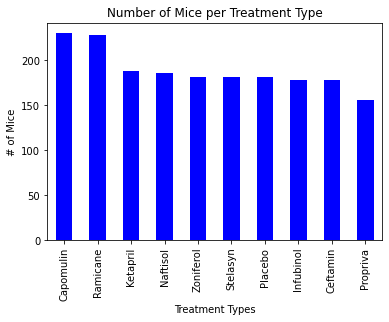

In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

# Get number of mice per treatment / drug regimen
treatment_data = merged_df["Drug Regimen"].value_counts()
treatment_data

# Filter the merged dataframe to only the drug regimen and the mouse ID
#mice_and_treatment = merged_df["Drug Regimen"]

# Set the index to the Treatment so that it will be used as labels
#mice_and_treatment = mice_and_treatment.set_index("Drug Regimen")
#mice_and_treatment.shape

# Create a bar chart of the data
treatment_data = treatment_data.sort_values(ascending=False)
treatment_data.plot(kind="bar", facecolor="blue")
#mice_and_treatment.plot(kind="bar", figsize=(10,5))

# Set title for the chart
plt.title("Number of Mice per Treatment Type")
plt.ylabel("# of Mice")
plt.xlabel("Treatment Types")

#plt.show()
#plt.tight_layout

<function matplotlib.pyplot.show(*args, **kw)>

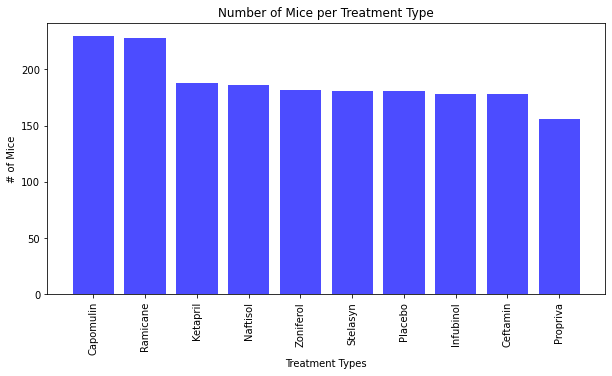

In [122]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



#Identify treatment types for the x-axis
#treatment_types = merged_df["Drug Regimen"].unique()

# Create x-axis data
#x_axis = np.arange(10)
#x_axis = np.arange(len(treatment_data))


#define the size of the chart
plt.figure(figsize=(10,5))

#Create the bar chart
plt.bar(x=treatment_data.index.values, height=treatment_data.values, color='b',  alpha=0.7, align="center")

#Set labels for the x-axis
plt.xticks(rotation=90)
plt.title("Number of Mice per Treatment Type")
plt.ylabel("# of Mice")
plt.xlabel("Treatment Types")


#Display the plot
plt.show


In [120]:
treatment_data.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 156], dtype=int64)

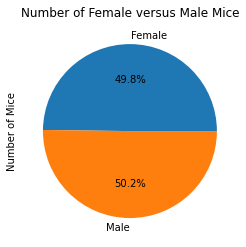

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# split the data into groups based on the Sex column
gender_groups = merged_df.groupby('Sex')

# identify the number of unique IDs are male vs female
gender_data = gender_groups["Mouse ID"].nunique()
#gender_data

#Generate the pie chart
gender_pie = gender_data.plot(kind="pie", title="Number of Female versus Male Mice", autopct='%1.1f%%')

#Set the Y label
gender_pie.set_ylabel("Number of Mice")

#Show the chart
plt.show()


([<matplotlib.patches.Wedge at 0x16158bb2550>,
 [Text(-0.006939175976765929, -1.0999781124353174, "['Female']"),
  Text(0.0069391759767660635, 1.0999781124353174, "['Male']")])

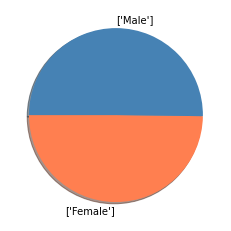

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# split the data into groups based on the Sex column
gender_groups1 = merged_df.groupby('Sex')

#Get labels for the different genders
labels = gender_groups["Sex"].unique()

# identify the number of unique IDs are male vs female
gender_data1 = gender_groups["Mouse ID"].nunique()
#gender_data

colors = ["coral", "steelblue"]

plt.pie(gender_data1, labels=labels, colors=colors, shadow=True, startangle=180)

##Issue - labels are not in the correct position because of label sort order.  Values in the pie chart are correct.

## Quartiles, Outliers and Boxplots

In [112]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


#find the max timepoint, get the tumor volume
timepoint_max = merged_df.loc[merged_df.groupby("Mouse ID")["Timepoint"].idxmax()]
#timepoint_max.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_df = pd.merge(merged_df, timepoint_max, on="Mouse ID", how="outer")

# Keep only the columns needed for the dataframe
#combined_df = combined_df.loc[:,["Mouse ID", "Drug Regimen_x", "Sex_x", "Age_months_x", "Weight (g)_x", "Timepoint_x", "Tumor Volume (mm3)_x", "Metastatic Sites_x", "Tumor Volume (mm3)_y"]]
combined_df = combined_df.loc[(combined_df["Drug Regimen_x"] =="Capomulin") | (combined_df["Drug Regimen_x"] == "Ramicane") | (combined_df["Drug Regimen_x"] == "Infubinol") | (combined_df["Drug Regimen_x"] == "Ceftamin"),["Mouse ID", "Drug Regimen_x", "Sex_x", "Age_months_x", "Weight (g)_x", "Timepoint_x", "Tumor Volume (mm3)_x", "Metastatic Sites_x", "Tumor Volume (mm3)_y"]]

# Rename the columns
combined_df = combined_df.rename(columns={"Drug Regimen_x": "Drug Regimen", "Sex_x": "Sex", "Age_months_x": "Age_months", "Weight (g)_x": "Weight (g)", "Timepoint_x": "Timepoint", "Tumor Volume (mm3)_x": "Tumor Volume (mm3)", "Metastatic Sites_x": "Metastatic Sites", "Tumor Volume (mm3)_y":"Tumor Volume Last Timepoint"})

#Display the combined dataframe
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126


In [107]:
combined_df["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ceftamin     178
Infubinol    178
Name: Drug Regimen, dtype: int64

In [126]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = combined_df["Drug Regimen"].unique()
treatment_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
tumor_vol_data

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for x in treatment_list:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #In the combined_df, locate the drug and associated with mouse
    tumor_volumesx = combined_df.loc[combined_df["Drug Regimen"] ==x, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volumesx)
    
    # Determine outliers using upper and lower bounds
    

[]

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
